In [1]:
# 14/01/2024

from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Cargar los datos, seleccionar dos columnas para la predicción y partilos en train/test

In [2]:
x, y = datasets.load_iris(as_frame=True, return_X_y=True)
x = x[["sepal length (cm)","sepal width (cm)"]]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [4]:
x.head(), y.head()

(   sepal length (cm)  sepal width (cm)
 0                5.1               3.5
 1                4.9               3.0
 2                4.7               3.2
 3                4.6               3.1
 4                5.0               3.6,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

Crear el clasificador, uso básico


In [5]:
cla = KNeighborsClassifier(n_neighbors=5)

Entrenarlo con los datos de train

In [6]:
cla.fit(X_train, y_train)

KNeighborsClassifier()

Predecir con los de test

In [7]:
y_predict = cla.predict(X_test)
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

Para ver la exactitud, proporción de predicciones correctas, con la función de scikit o haciendo el cálculo.

In [8]:
accuracy_score(y_test,y_predict)

0.7631578947368421

In [9]:
(y_test == y_predict).sum()/len(y_test)

0.7631578947368421

Gráfico con los datos de train

Text(0.5, 0.98, 'Train')

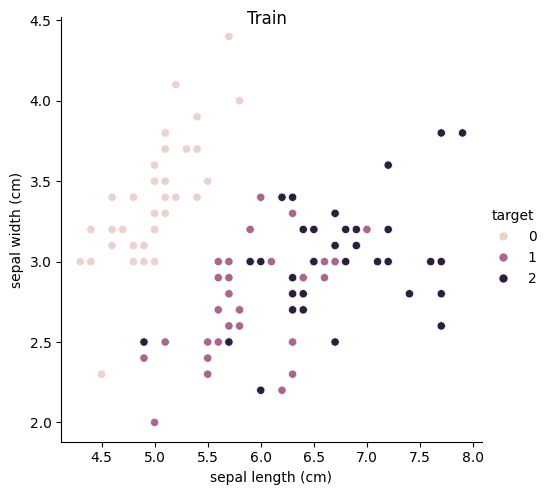

In [10]:
rel = sns.relplot(data = X_train, x ="sepal length (cm)" , y ="sepal width (cm)" , hue = y_train)
rel.fig.suptitle('Train')

Gráfico con los datos de test, incluye la predicción y si acertó o no.

Text(0.5, 0.98, 'Predicciones')

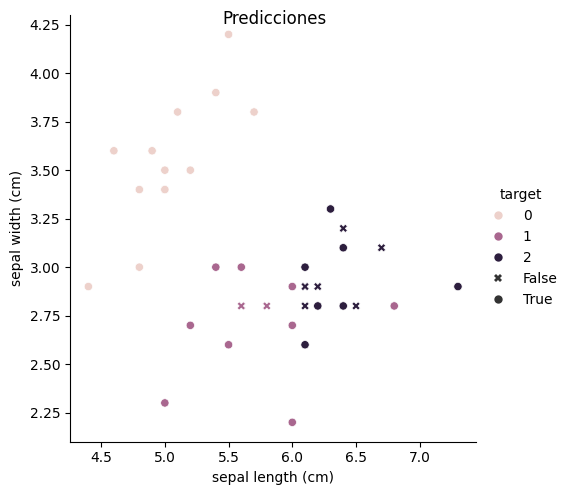

In [11]:
# True acertó, False falló
rel = sns.relplot(data = X_test, x ="sepal length (cm)" , y ="sepal width (cm)" , hue = y_predict, style=(y_predict==y_test), markers = ["X","o"])
rel.fig.suptitle('Predicciones')

Para ver las probabilidades al predecir. Para cada fila en X_test, hay una fila de salida. En las filas de salida hay tres columnas, una por cada clase. En la columna 0, está la probabilidad de que pertenezca a la clase 0.

In [12]:
y_predict_proba = cla.predict_proba(X_test)
y_predict_proba[:5]

array([[0. , 0.6, 0.4],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ]])